In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define our actions

def action_0():
    return np.random.choice([1, 0], p=[0.5, 0.5])

def action_1():
    return np.random.choice([1, 0], p=[0.6, 0.4])

def action_2():
    return np.random.choice([1, 0], p=[0.2, 0.8])

rewards = [action_0, action_1, action_2]

In [3]:
for i in range(10):
    print('Pull %d (action_0): reward=%d' % (i, rewards[0]()))

Pull 0 (action_0): reward=0
Pull 1 (action_0): reward=0
Pull 2 (action_0): reward=0
Pull 3 (action_0): reward=0
Pull 4 (action_0): reward=1
Pull 5 (action_0): reward=1
Pull 6 (action_0): reward=0
Pull 7 (action_0): reward=0
Pull 8 (action_0): reward=1
Pull 9 (action_0): reward=1


In [4]:
# Simulate action values (Q): expected reward for each action
pulls = 100000

action_values = []
for reward in rewards:
    value = [reward() for _ in range(pulls)]  # execute each of the actions 'pulls' times
    action_values.append(value)

for action, value in enumerate(action_values):
    print("Action %d: Q(a_%d)=%.2f" % (action, action, np.mean(value)))

Action 0: Q(a_0)=0.50
Action 1: Q(a_1)=0.60
Action 2: Q(a_2)=0.20


In [5]:
# To simulate the values (V), we need to define a policy
# (Value is the expected reward given the policy I'm following)

# Define a policy:
def policy_random():
    '''Returns which action to perform using equal probabilities for each action'''
    return np.random.choice([0, 1, 2], p=[1/3, 1/3, 1/3])


def policy_better():
    ''' A better policy than random: we choose actions 0 and 1 more often than action 2'''
    return np.random.choice([0, 1, 2], p=[0.4, 0.5, 0.1])


In [6]:
# Simulate Values using the random policy
total_reward = 0
for pull in range(pulls):
    action = policy_random()
    total_reward += rewards[action]()
print("Total reward =", total_reward)
print("Average reward: V =", total_reward/pulls)

Total reward = 43385
Average reward: V = 0.43385


In [7]:
# Simulate Values using the better policy
total_reward = 0
for pull in range(pulls):
    action = policy_better()
    total_reward += rewards[action]()
print("Total reward =", total_reward)
print("Average reward: V =", total_reward/pulls)

Total reward = 52094
Average reward: V = 0.52094


In [8]:
# Regret of the better policy
V_star = max([np.mean(value) for value in action_values])
print("V* =", V_star)

total_regret = 0
for pull in range(pulls):
    total_regret += (V_star - rewards[policy_better()]())
print('Regret: I_t = %.2f' % (total_regret/pulls))

V* = 0.59906
Regret: I_t = 0.08


In [9]:
# Some bandit policies to explore:

def policy_greedy(action_values):
    '''Always returns the action for which the payoff is highest'''
    best_action = np.argmax([np.mean(value) for value in action_values])
    return best_action


def policy_e_greedy(action_values, epsilon=0.05):
    '''We explore with epsilon probability, and choose the best action the rest of the time'''
    explore = np.random.choice([1, 0], p=[epsilon, 1-epsilon])
    if explore:
        # Random action
        return policy_random()
    else:
        # Choose best action
        return policy_greedy(action_values)



In [10]:
# Implementing the decaying epsilon-greedy properly requires a class definition so we can store the epsilon values
class DecayingEGreedy:
    
    def __init__(self, epsilon, decay=0.99, lower_bound=0):
        self.epsilon = epsilon
        self.decay = decay
        self.lower_bound = lower_bound
        
    def policy(self, action_values):
        if self.lower_bound > 0 and self.epsilon > self.lower_bound:
            self.epsilon *= self.decay  # update epsilon
        explore = np.random.choice([1, 0], p=[self.epsilon, 1-self.epsilon])  # explore vs exploit decision
        if explore:
            # Random action
            return policy_random()
        else:
            # Choose best action
            return policy_greedy(action_values)


In [11]:
# Let's test the decaying epsilon-greedy approach
agent = DecayingEGreedy(epsilon=0.1, decay=0.99, lower_bound=0.03)

# Full problem:
action_values = [[], [], []] # initialise values
rewards_decaying_e_greedy = []
total_reward = 0
print('Number of pulls\t\tTotal reward\t\tV')
for pull in range(pulls):
    action = agent.policy(action_values)  # choose action according to policy
    reward = rewards[action]()  # get reward
    action_values[action].append(reward)  # update action_values so we make better decisions down the line
    total_reward += reward
    if (pull+1) % 1000 == 0:
        print('%d\t\t\t%d\t\t\t%.3f' % (pull+1, total_reward, total_reward/pull))
        rewards_decaying_e_greedy.append(total_reward/pull)



Number of pulls		Total reward		V
1000			564			0.565


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2000			1157			0.579
3000			1740			0.580
4000			2318			0.580
5000			2893			0.579
6000			3502			0.584
7000			4110			0.587
8000			4707			0.588
9000			5266			0.585
10000			5856			0.586
11000			6483			0.589
12000			7096			0.591
13000			7691			0.592
14000			8285			0.592
15000			8870			0.591
16000			9471			0.592
17000			10067			0.592
18000			10662			0.592
19000			11265			0.593
20000			11865			0.593
21000			12456			0.593
22000			13069			0.594
23000			13646			0.593
24000			14256			0.594
25000			14866			0.595
26000			15476			0.595
27000			16045			0.594
28000			16635			0.594
29000			17248			0.595
30000			17839			0.595
31000			18431			0.595
32000			19035			0.595
33000			19609			0.594
34000			20193			0.594
35000			20787			0.594
36000			21380			0.594
37000			21975			0.594
38000			22585			0.594
39000			23207			0.595
40000			23815			0.595
41000			24407			0.595
42000			24996			0.595
43000			25585			0.595
44000			26190			0.595
45000			26779			0.595
46000			27379			0.595
47000			27977			0.595
48000			285

Text(0, 0.5, 'Average reward (V)')

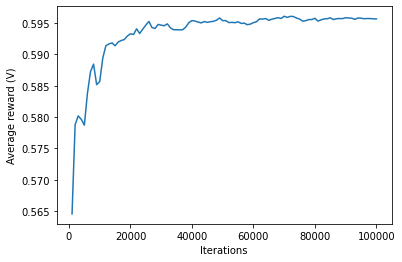

In [12]:
plt.plot(np.arange(1000, pulls+1, step=1000), rewards_decaying_e_greedy)
plt.xlabel("Iterations")
plt.ylabel("Average reward (V)")
# The average reward is 0.594, which is very close to V* (0.6)!

In [13]:
# Implementing the decaying epsilon-greedy properly requires a class definition so we can store the epsilon values
class UCB:
    
    def __init__(self, C=0.5, n_arms=3):
        self.C = C
        self.pulls = 0
        self.counts = np.asarray([0] * n_arms)
        
    def update_counts(self, arm):
        self.pulls += 1
        self.counts[arm] += 1
        
    def policy(self, action_values):
        action_values = np.asarray([np.mean(value) for value in action_values])
        uncertainty = np.sqrt(np.log(self.pulls) / self.counts)
        ucb = action_values + self.C * uncertainty
        action = np.argmax(ucb)
        self.update_counts(action)
        return action


In [14]:
# Let's test the decaying epsilon-greedy approach
agent = UCB(C=0.5)

# Full problem:
action_values = [[], [], []] # initialise values
total_reward = 0 # reset reward
rewards_ucb = []
print('Number of pulls\t\tTotal reward\t\tV')
for pull in range(pulls):
    action = agent.policy(action_values)  # choose action according to policy
    reward = rewards[action]()  # get reward
    action_values[action].append(reward)  # update action_values so we make better decisions down the line
    total_reward += reward
    if (pull+1) % 1000 == 0:
        print('%d\t\t\t%d\t\t\t%.3f' % (pull+1, total_reward, total_reward/pull))
        rewards_ucb.append(total_reward/pull)


Number of pulls		Total reward		V
1000			573			0.574


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


2000			1184			0.592
3000			1776			0.592
4000			2389			0.597
5000			2973			0.595
6000			3577			0.596
7000			4176			0.597
8000			4775			0.597
9000			5374			0.597
10000			5986			0.599
11000			6581			0.598
12000			7189			0.599
13000			7806			0.601
14000			8417			0.601
15000			9003			0.600
16000			9581			0.599
17000			10194			0.600
18000			10791			0.600
19000			11377			0.599
20000			11991			0.600
21000			12621			0.601
22000			13219			0.601
23000			13821			0.601
24000			14409			0.600
25000			15013			0.601
26000			15626			0.601
27000			16212			0.600
28000			16810			0.600
29000			17376			0.599
30000			17982			0.599
31000			18578			0.599
32000			19170			0.599
33000			19743			0.598
34000			20347			0.598
35000			20948			0.599
36000			21556			0.599
37000			22137			0.598
38000			22762			0.599
39000			23360			0.599
40000			23982			0.600
41000			24602			0.600
42000			25174			0.599
43000			25782			0.600
44000			26397			0.600
45000			26986			0.600
46000			27544			0.599
47000			28146			0.599
48000			287

Text(0, 0.5, 'Average reward (V)')

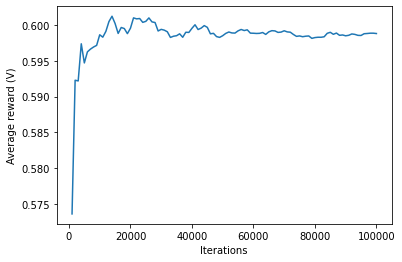

In [15]:
plt.plot(np.arange(1000, pulls+1, step=1000), rewards_ucb)
plt.xlabel("Iterations")
plt.ylabel("Average reward (V)")